PREDICTIVE ANALYTICS FOR CROP YIELD OPTIMIZATION

In [1]:
import pandas as pd
import numpy as np

Load dataset


In [3]:

data = pd.read_csv('/content/crop_yield_data.csv')


In [4]:
print(data.head())

   Year   Region   Crop  Yield  Rainfall  Temperature  Soil_Phosphorus  \
0  2020  Region1  Wheat    3.5       450         22.5               30   
1  2020  Region2  Wheat    4.0       500         20.1               32   
2  2020  Region1   Corn    6.2       300         25.3               28   
3  2020  Region2   Corn    6.5       320         23.7               31   
4  2021  Region1  Wheat    3.8       460         21.8               29   

   Soil_Potassium  NDVI  
0             200  0.85  
1             210  0.80  
2             180  0.90  
3             190  0.88  
4             195  0.87  


In [5]:
# Handle missing values
data = data.dropna()

In [6]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['Region', 'Crop'], drop_first=True)

In [7]:
# Normalize numerical features
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
numerical_features = ['Rainfall', 'Temperature', 'Soil_Phosphorus', 'Soil_Potassium', 'NDVI']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

Exploratory Data Analysis(EDA)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

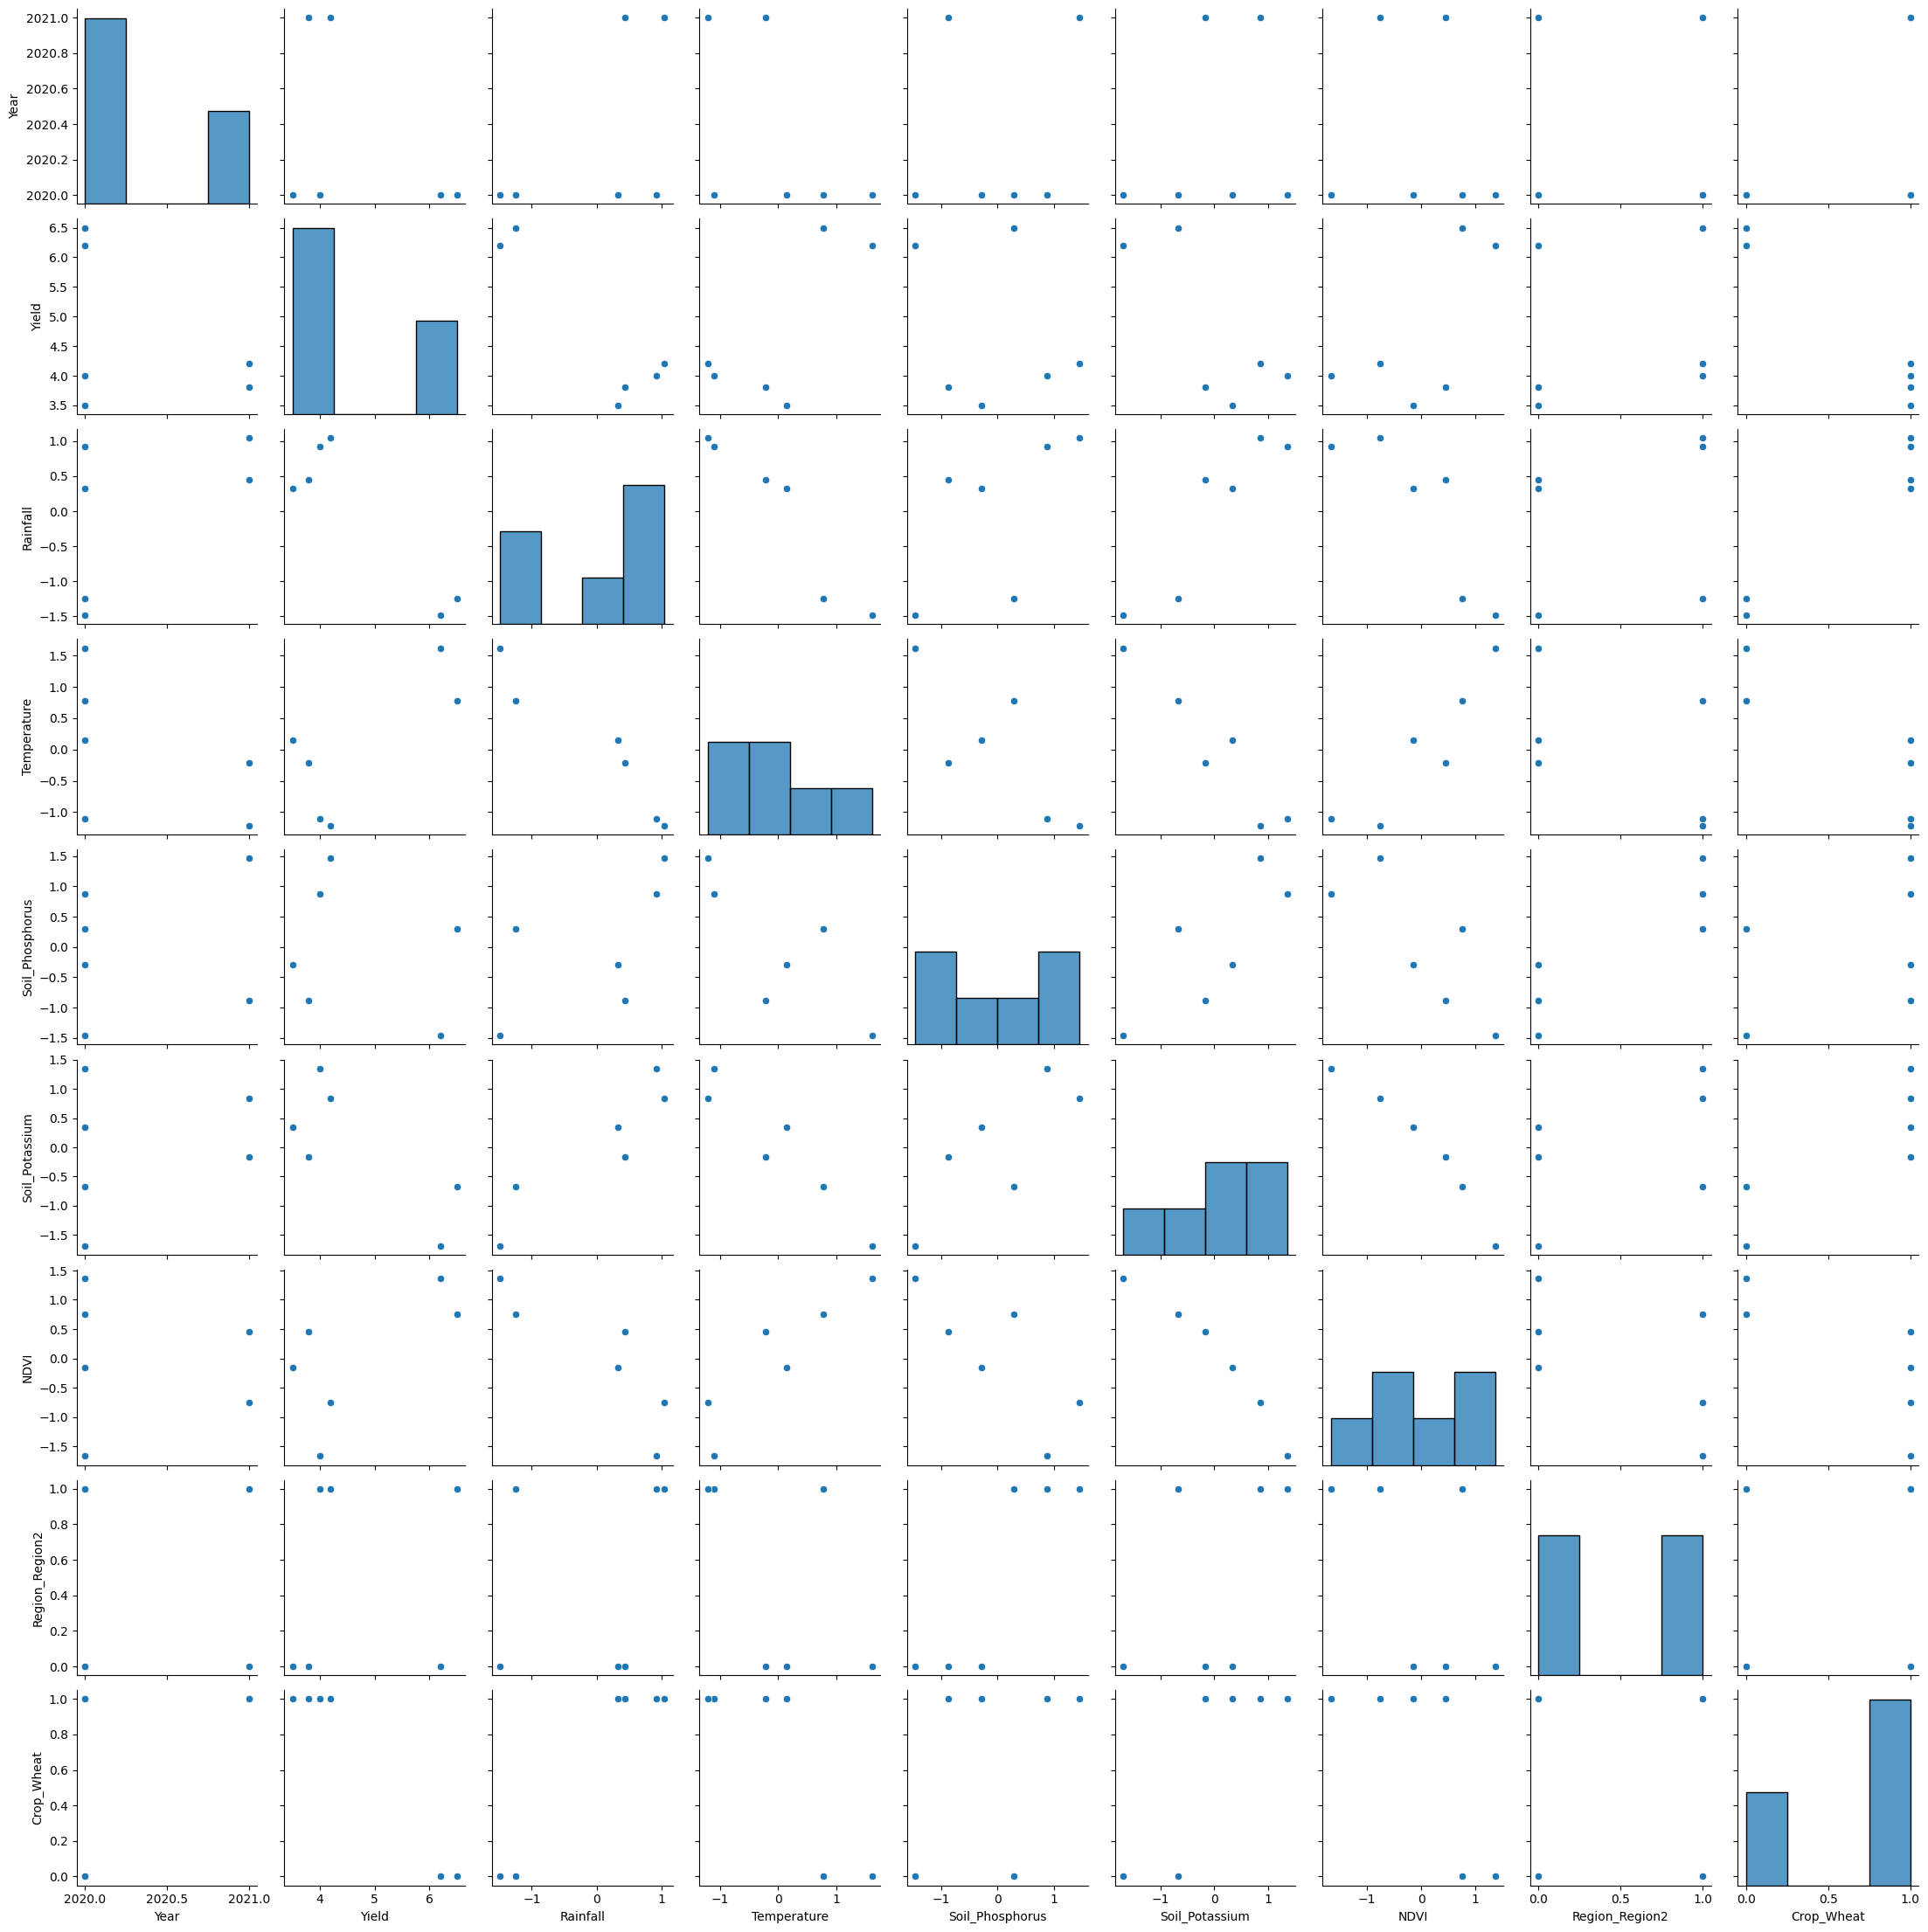

In [10]:
# Pairplot to visualize relationships
sns.pairplot(data)
plt.show()

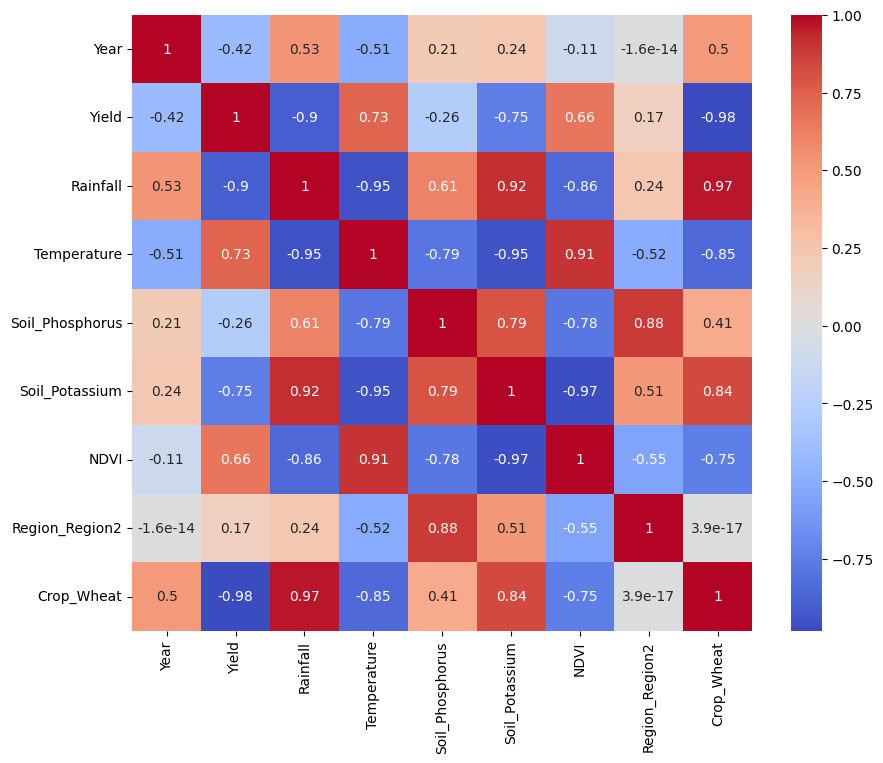

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

Feature Engineering

In [12]:
# Create lag features for rainfall and temperature
data['Rainfall_Lag1'] = data['Rainfall'].shift(1)
data['Temperature_Lag1'] = data['Temperature'].shift(1)
data = data.dropna()  # Drop rows with NaN values created by shift


MODEL DEVELOPMENT

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# Split the data into training and testing sets
X = data.drop('Yield', axis=1)
y = data['Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
# Predict on the test set
y_pred = model.predict(X_test)

In [18]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [19]:
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

RMSE: 1.0419999999999998
R²: nan


MODEL EVALUATION


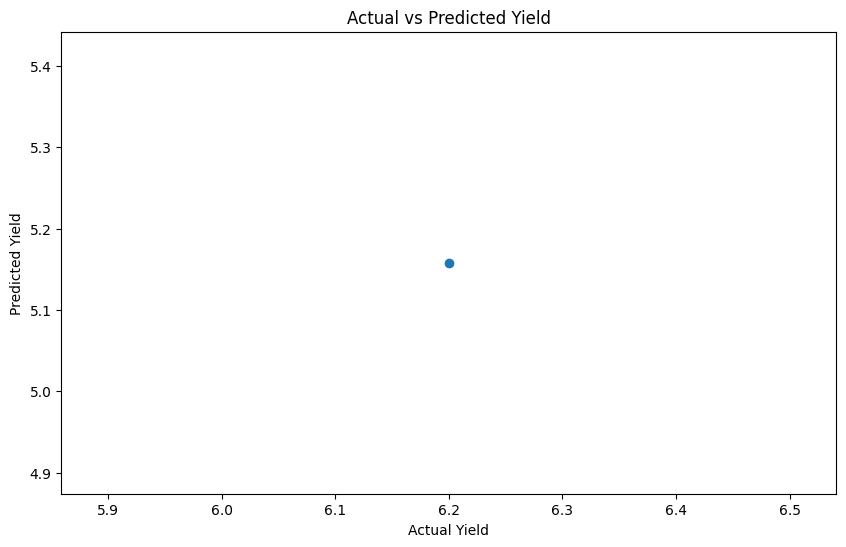

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.show()


DEPLOYMENT

In [22]:
from flask import Flask, request, jsonify

In [23]:
app = Flask(__name__)

In [24]:
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    input_data = pd.DataFrame([data])
    input_data[numerical_features] = scaler.transform(input_data[numerical_features])
    prediction = model.predict(input_data)
    return jsonify({'predicted_yield': prediction[0]})

In [25]:
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
